# Трофимов Михаил ПМ22-1. Вариант 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1. Загрузите данные по вариантам в ноутбук.**

In [2]:
table = pd.read_excel('Вариант 2.xlsx', skiprows = [0, 1, 2359])
table #Импортирвали таблицу из экселя, пропуская первые две и последнюю строчки

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,27
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,27
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,27
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,27


**2. Сделайте описательную статистику полученных данных.**

In [3]:
table.describe() #describe() выдала описательную статистику

,№,№ школы,Номер варианта,Устная часть,Первичный балл,Балл,Минимальный балл
count,2356.000000,2356.000000,2356.000000,0.0,2356.000000,2356.000000,2356.0
mean,1178.500000,132.005518,338.273769,NaN,10.123939,49.255093,27.0
std,680.262939,5.037984,53.660878,NaN,3.820484,17.880420,0.0
min,1.000000,121.000000,101.000000,NaN,1.000000,5.000000,27.0
25%,589.750000,127.000000,339.000000,NaN,7.000000,33.000000,27.0
50%,1178.500000,135.000000,342.500000,NaN,10.000000,50.000000,27.0
75%,1767.250000,136.000000,346.000000,NaN,13.000000,68.000000,27.0
max,2356.000000,137.000000,506.000000,NaN,27.000000,96.000000,27.0


**3. Найдите процент учащихся, выполнивших работу ниже среднего.**

In [4]:
count_below_mean = len(table[table['Балл'] < table['Балл'].mean()])
count_below_mean 
#Посчитали число учеников, выполнивших работу ниже среднего. Ниже вывели их процент

1131

In [5]:
percent_below_mean = (count_below_mean / len(table))*100
print(f'Процент учащихся, выполнивших работу ниже среднего: {percent_below_mean:.2f}%')

Процент учащихся, выполнивших работу ниже среднего: 48.01%


**4. Найти процент учащихся не сдавших экзамен.**

In [6]:
count_failure = len(table[table['Балл'] < table['Минимальный балл']])
count_failure
#Посчитали число учеников, не сдавших экзамен. Ниже вывели их процент

217

In [7]:
percent_failure = (count_failure / len(table))*100
print(f'Процент учащихся не сдавших экзамен: {percent_failure:.2f}%')

Процент учащихся не сдавших экзамен: 9.21%


**5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.**

In [8]:
data = pd.DataFrame({'': [100 - percent_failure, percent_failure]}, 
                    index = ['Сдали', 'Не сдали'])
data #Создал промежуточный ДатаФрейм для удобства

,
Сдали,90.789474
Не сдали,9.210526


Text(0.5, 1.0, 'Распределение сдавших и не сдавших экзамен')

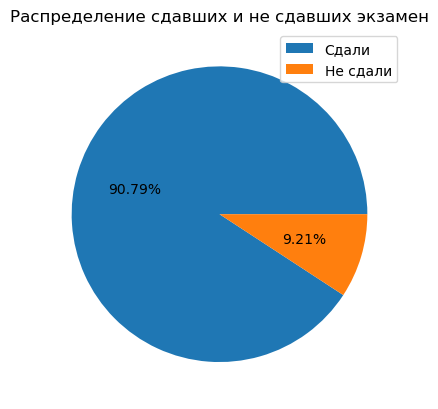

In [9]:
#Построил круговую диаграмму
data.plot.pie(y = '', autopct='%1.2f%%', labels = None)
plt.title('Распределение сдавших и не сдавших экзамен')

**6. Постройте ядерную оценку плотности распределения баллов за экзамен.**

Text(0.5, 1.0, 'Ядерная оценка плотности распределения баллов за экзамен')

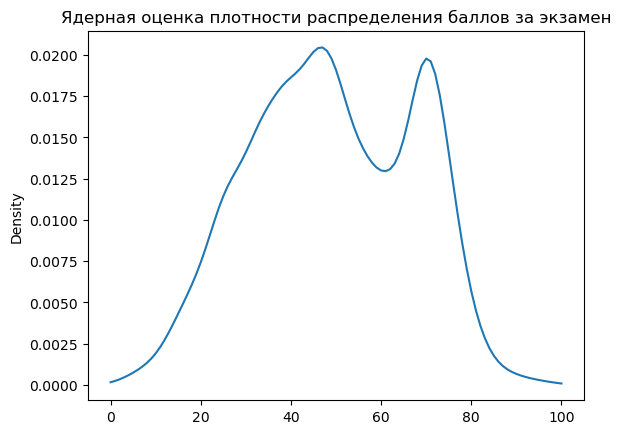

In [10]:
#Используя density построил ядерную оценку плотности распределения
#Параметр ind помог "сократить" график, строя плотность только по целым точкам
table['Балл'].plot.density(ind = [i for i in range(0,101)])
plt.title('Ядерная оценка плотности распределения баллов за экзамен')

**7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».**

Математика (профильный уровень):<br/>
0-26 баллов - оценка 2,<br/>
27-49 баллов - оценка 3,<br/>
50-67 баллов - оценка 4,<br/>
68 и выше баллов - оценка 5

In [11]:
#Создал массив, содержащий кол-ва учеников, сдавших экзамен на ту или иную оценку
count_of_passes = [len(table[table['Балл'] < 27]),
                   len(table[(table['Балл'] >= 27) & (table['Балл'] < 50)]), 
                   len(table[(table['Балл'] >= 50) & (table['Балл'] < 68)]),
                   len(table[table['Балл'] >= 68])]
count_of_passes, sum(count_of_passes)

([217, 914, 622, 603], 2356)

In [12]:
#Через цикл вывел проценты
evaluations = ['Неудовлетворительно', 'Удовлетворительно', 'Хорошо', 'Отлично']
for i in range(4):
    print(f'Процент учащихся, сдавших на {evaluations[i]} - {(count_of_passes[i] / len(table))*100:.4f}%')

Процент учащихся, сдавших на Неудовлетворительно - 9.2105%
Процент учащихся, сдавших на Удовлетворительно - 38.7946%
Процент учащихся, сдавших на Хорошо - 26.4007%
Процент учащихся, сдавших на Отлично - 25.5942%


**8. Какое процентное соотношение юношей и девушек писало данный экзамен?**

In [13]:
count_M = len(table[table['Пол'] == 'М'])
count_F = len(table[table['Пол'] == 'Ж'])
count_M, count_F #Кол-ва юношей и девушек. Ниже вывел проценты

(1111, 1245)

In [14]:
print(f'Процент юношей: {(count_M / len(table))*100:.2f}%\nПроцент девушек: {(count_F / len(table))*100:.2f}%')

Процент юношей: 47.16%
Процент девушек: 52.84%


**9. Сколько школ принимало участие в экзамене?**

In [15]:
#Использовал np.unique(), чтобы найти все уникальные номера школ
count_of_schools = len(np.unique(table['№ школы']))
print(f'Кол-во школ, принимавших участие в экзамене: {count_of_schools}')

Кол-во школ, принимавших участие в экзамене: 17


**10. Сколько всего заданий с кратким ответом? С развернутым ответом?**

In [16]:
#Один номер - один плюс или минус. Следовательно длина строки - число номеров
count_of_short = len(table['Задания с кратким ответом'][0])
print(f'Кол-во заданий с Кратким ответом: {count_of_short}')

Кол-во заданий с Кратким ответом: 12


In [17]:
#Один номер - маска b(m) длиной 4. b - число выставленных баллов, m - число макс баллов
#Следовательно длина строки делить на 4 - число номеров с развёрнутым ответом
count_of_long = len(table['Задания с развёрнутым ответом'][0])//4
print(f'Кол-во заданий с Развёрнутым ответом: {count_of_long}')

Кол-во заданий с Развёрнутым ответом: 7


**11. Пусть задания с кратким ответом будут задания типа В. <br/>Соответственно всего по экзамену вопросов класса В: В1, B2, ..., Вк. <br/>Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.**

In [18]:
#Собираем информацию по выполненным заданиям в массив, ниже выводим проценты
count_of_done_short = [0]*count_of_short
for i in range(len(table)):
    for j in range(count_of_short):
        if table['Задания с кратким ответом'][i][j] == '+':
            count_of_done_short[j] += 1
count_of_done_short

[2103, 2246, 2186, 2144, 2085, 1724, 883, 1127, 2164, 1684, 1396, 1089]

In [19]:
for i in range(count_of_short):
    print(f'Процент выполненных заданий типа {i+1}: {count_of_done_short[i]/len(table)*100:.2f}%')
    print(f'Процент невыполненных заданий типа {i+1}: {100 - count_of_done_short[i]/len(table)*100:.2f}%\n')

Процент выполненных заданий типа 1: 89.26%
Процент невыполненных заданий типа 1: 10.74%

Процент выполненных заданий типа 2: 95.33%
Процент невыполненных заданий типа 2: 4.67%

Процент выполненных заданий типа 3: 92.78%
Процент невыполненных заданий типа 3: 7.22%

Процент выполненных заданий типа 4: 91.00%
Процент невыполненных заданий типа 4: 9.00%

Процент выполненных заданий типа 5: 88.50%
Процент невыполненных заданий типа 5: 11.50%

Процент выполненных заданий типа 6: 73.17%
Процент невыполненных заданий типа 6: 26.83%

Процент выполненных заданий типа 7: 37.48%
Процент невыполненных заданий типа 7: 62.52%

Процент выполненных заданий типа 8: 47.84%
Процент невыполненных заданий типа 8: 52.16%

Процент выполненных заданий типа 9: 91.85%
Процент невыполненных заданий типа 9: 8.15%

Процент выполненных заданий типа 10: 71.48%
Процент невыполненных заданий типа 10: 28.52%

Процент выполненных заданий типа 11: 59.25%
Процент невыполненных заданий типа 11: 40.75%

Процент выполненных з

**12. Аналогично и с типом С (ответы с развернутым ответом)**

Буду считать выполненными заданиями те, за которые стоит более 0 баллов

In [20]:
#Собираем информацию по выполненным заданиям в массив, ниже выводим проценты
count_of_done_long = [0]*count_of_long
for i in range(len(table)):
    for j in range(0, count_of_long*4, 4):
        if table['Задания с развёрнутым ответом'][i][j] != '0':
            count_of_done_long[j//4] += 1
count_of_done_long

[799, 374, 367, 64, 80, 26, 80]

In [21]:
for i in range(count_of_long):
    print(f'Процент выполненных заданий типа {i+1}: {count_of_done_long[i]/len(table)*100:.2f}%')
    print(f'Процент невыполненных заданий типа {i+1}: {100 - count_of_done_long[i]/len(table)*100:.2f}%\n')

Процент выполненных заданий типа 1: 33.91%
Процент невыполненных заданий типа 1: 66.09%

Процент выполненных заданий типа 2: 15.87%
Процент невыполненных заданий типа 2: 84.13%

Процент выполненных заданий типа 3: 15.58%
Процент невыполненных заданий типа 3: 84.42%

Процент выполненных заданий типа 4: 2.72%
Процент невыполненных заданий типа 4: 97.28%

Процент выполненных заданий типа 5: 3.40%
Процент невыполненных заданий типа 5: 96.60%

Процент выполненных заданий типа 6: 1.10%
Процент невыполненных заданий типа 6: 98.90%

Процент выполненных заданий типа 7: 3.40%
Процент невыполненных заданий типа 7: 96.60%



**13. Сделайте анализ по двум школам:<br/>
1 - по всем выполненным заданиям типа В<br/>
2 - по заданиям типа С больше 50%<br/>
3 - по среднему баллу юношей и девушек**

In [22]:
np.unique(table['№ школы']) #Выводим все номера школ, выберем 125 и 135

array([121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137])

Школа 125

In [23]:
table_125 = table[table['№ школы'] == 125]
table_125 #Выводим таблицу по 125 школе

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
60,61,125,11А,Ж,343,-+++----+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,4,18,27
139,140,125,11Б,М,348,++++----+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,5,23,27
140,141,125,13,М,106,+++-+--+----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,5,23,27
233,234,125,13,Ж,504,+++-+--++---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,6,27,27
234,235,125,13,М,106,++++++------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,6,27,27
...,...,...,...,...,...,...,...,...,...,...,...
1921,1922,125,11,М,339,++++++++++++,0(2)2(2)0(2)0(3)0(3)0(4)0(4),NaN,14,70,27
1922,1923,125,11,Ж,347,++++++++++++,2(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,14,70,27
1923,1924,125,11,Ж,346,-++++++-++++,2(2)0(2)2(2)0(3)0(3)0(4)0(4),NaN,14,70,27
2059,2060,125,11А,М,346,++++++++++++,1(2)0(2)2(2)0(3)0(3)0(4)0(4),NaN,15,72,27


In [24]:
#Запустим для неё подкорректированный код номера 11
count_of_done_short = [0]*count_of_short
for i in table_125.index:
    for j in range(count_of_short):
        if table['Задания с кратким ответом'][i][j] == '+':
            count_of_done_short[j] += 1
for i in range(count_of_short):
    print(f'Процент выполненных заданий типа {i+1}: {count_of_done_short[i]/len(table_125)*100:.2f}%')
    print(f'Процент невыполненных заданий типа {i+1}: {100 - count_of_done_short[i]/len(table_125)*100:.2f}%\n')

Процент выполненных заданий типа 1: 87.01%
Процент невыполненных заданий типа 1: 12.99%

Процент выполненных заданий типа 2: 96.10%
Процент невыполненных заданий типа 2: 3.90%

Процент выполненных заданий типа 3: 96.10%
Процент невыполненных заданий типа 3: 3.90%

Процент выполненных заданий типа 4: 94.81%
Процент невыполненных заданий типа 4: 5.19%

Процент выполненных заданий типа 5: 94.81%
Процент невыполненных заданий типа 5: 5.19%

Процент выполненных заданий типа 6: 79.22%
Процент невыполненных заданий типа 6: 20.78%

Процент выполненных заданий типа 7: 35.06%
Процент невыполненных заданий типа 7: 64.94%

Процент выполненных заданий типа 8: 46.75%
Процент невыполненных заданий типа 8: 53.25%

Процент выполненных заданий типа 9: 96.10%
Процент невыполненных заданий типа 9: 3.90%

Процент выполненных заданий типа 10: 83.12%
Процент невыполненных заданий типа 10: 16.88%

Процент выполненных заданий типа 11: 67.53%
Процент невыполненных заданий типа 11: 32.47%

Процент выполненных за

In [25]:
#Запустим для неё подкорректированный код номера 12
count_of_done_long = [0]*count_of_long
for i in table_125.index:
    for j in range(0, count_of_long*4, 4):
        if table['Задания с развёрнутым ответом'][i][j] >= table['Задания с развёрнутым ответом'][i][j+2]:
            count_of_done_long[j//4] += 1
for i in range(count_of_long):
    print(f'Процент учеников, выполнивших задание типа {i+1} более чем 50%: {count_of_done_long[i]/len(table_125)*100:.2f}%')
    print(f'Процент учеников, выполнивших задание типа {i+1} менее чем 50%: {100 - count_of_done_long[i]/len(table_125)*100:.2f}%\n')

Процент учеников, выполнивших задание типа 1 более чем 50%: 25.97%
Процент учеников, выполнивших задание типа 1 менее чем 50%: 74.03%

Процент учеников, выполнивших задание типа 2 более чем 50%: 3.90%
Процент учеников, выполнивших задание типа 2 менее чем 50%: 96.10%

Процент учеников, выполнивших задание типа 3 более чем 50%: 5.19%
Процент учеников, выполнивших задание типа 3 менее чем 50%: 94.81%

Процент учеников, выполнивших задание типа 4 более чем 50%: 0.00%
Процент учеников, выполнивших задание типа 4 менее чем 50%: 100.00%

Процент учеников, выполнивших задание типа 5 более чем 50%: 0.00%
Процент учеников, выполнивших задание типа 5 менее чем 50%: 100.00%

Процент учеников, выполнивших задание типа 6 более чем 50%: 0.00%
Процент учеников, выполнивших задание типа 6 менее чем 50%: 100.00%

Процент учеников, выполнивших задание типа 7 более чем 50%: 0.00%
Процент учеников, выполнивших задание типа 7 менее чем 50%: 100.00%



In [26]:
#Вычисляем средние баллы юношей и девушек
male_125 = table_125[table_125['Пол'] == 'М']['Балл'].mean()
female_125 = table_125[table_125['Пол'] == 'Ж']['Балл'].mean()
print(f'Юноши Школы 125 в среднем сдали экзамен на {male_125:.2f} баллов,\nДевушки же на {female_125:.2f} баллов')

Юноши Школы 125 в среднем сдали экзамен на 48.89 баллов,
Девушки же на 50.39 баллов


Школа 135

In [27]:
table_135 = table[table['№ школы'] == 135]
table_135 #Выводим таблицу по 135 школе

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
15,16,135,12,М,339,++----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,2,9,27
39,40,135,12,М,337,-+-++-------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,3,14,27
80,81,135,13,М,103,+++-+-------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,4,18,27
81,82,135,11,Ж,348,++-+----+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,4,18,27
82,83,135,12,М,339,+++------+--,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,4,18,27
...,...,...,...,...,...,...,...,...,...,...,...
2170,2171,135,11,М,348,++++++++++++,2(2)0(2)2(2)0(3)0(3)0(4)0(4),NaN,16,74,27
2171,2172,135,11,Ж,342,++++++++++++,2(2)0(2)2(2)0(3)0(3)0(4)0(4),NaN,16,74,27
2238,2239,135,11,М,347,++++++++++++,2(2)0(2)2(2)0(3)0(3)0(4)1(4),NaN,17,76,27
2284,2285,135,11,Ж,345,+++++++-++++,2(2)2(2)2(2)0(3)1(3)0(4)0(4),NaN,18,78,27


In [28]:
#Запустим для неё подкорректированный код номера 11
count_of_done_short = [0]*count_of_short
for i in table_135.index:
    for j in range(count_of_short):
        if table['Задания с кратким ответом'][i][j] == '+':
            count_of_done_short[j] += 1
for i in range(count_of_short):
    print(f'Процент выполненных заданий типа {i+1}: {count_of_done_short[i]/len(table_135)*100:.2f}%')
    print(f'Процент невыполненных заданий типа {i+1}: {100 - count_of_done_short[i]/len(table_135)*100:.2f}%\n')

Процент выполненных заданий типа 1: 88.46%
Процент невыполненных заданий типа 1: 11.54%

Процент выполненных заданий типа 2: 96.15%
Процент невыполненных заданий типа 2: 3.85%

Процент выполненных заданий типа 3: 91.76%
Процент невыполненных заданий типа 3: 8.24%

Процент выполненных заданий типа 4: 85.71%
Процент невыполненных заданий типа 4: 14.29%

Процент выполненных заданий типа 5: 91.76%
Процент невыполненных заданий типа 5: 8.24%

Процент выполненных заданий типа 6: 71.98%
Процент невыполненных заданий типа 6: 28.02%

Процент выполненных заданий типа 7: 39.01%
Процент невыполненных заданий типа 7: 60.99%

Процент выполненных заданий типа 8: 43.96%
Процент невыполненных заданий типа 8: 56.04%

Процент выполненных заданий типа 9: 89.56%
Процент невыполненных заданий типа 9: 10.44%

Процент выполненных заданий типа 10: 72.53%
Процент невыполненных заданий типа 10: 27.47%

Процент выполненных заданий типа 11: 54.95%
Процент невыполненных заданий типа 11: 45.05%

Процент выполненных 

In [29]:
#Запустим для неё подкорректированный код номера 12
count_of_done_long = [0]*count_of_long
for i in table_135.index:
    for j in range(0, count_of_long*4, 4):
        if table['Задания с развёрнутым ответом'][i][j] >= table['Задания с развёрнутым ответом'][i][j+2]:
            count_of_done_long[j//4] += 1
for i in range(count_of_long):
    print(f'Процент учеников, выполнивших задание типа {i+1} более чем 50%: {count_of_done_long[i]/len(table_135)*100:.2f}%')
    print(f'Процент учеников, выполнивших задание типа {i+1} менее чем 50%: {100 - count_of_done_long[i]/len(table_135)*100:.2f}%\n')

Процент учеников, выполнивших задание типа 1 более чем 50%: 22.53%
Процент учеников, выполнивших задание типа 1 менее чем 50%: 77.47%

Процент учеников, выполнивших задание типа 2 более чем 50%: 3.85%
Процент учеников, выполнивших задание типа 2 менее чем 50%: 96.15%

Процент учеников, выполнивших задание типа 3 более чем 50%: 6.59%
Процент учеников, выполнивших задание типа 3 менее чем 50%: 93.41%

Процент учеников, выполнивших задание типа 4 более чем 50%: 0.55%
Процент учеников, выполнивших задание типа 4 менее чем 50%: 99.45%

Процент учеников, выполнивших задание типа 5 более чем 50%: 0.00%
Процент учеников, выполнивших задание типа 5 менее чем 50%: 100.00%

Процент учеников, выполнивших задание типа 6 более чем 50%: 0.00%
Процент учеников, выполнивших задание типа 6 менее чем 50%: 100.00%

Процент учеников, выполнивших задание типа 7 более чем 50%: 0.00%
Процент учеников, выполнивших задание типа 7 менее чем 50%: 100.00%



In [30]:
#Вычисляем средние баллы юношей и девушек
male_135 = table_135[table_135['Пол'] == 'М']['Балл'].mean()
female_135 = table_135[table_135['Пол'] == 'Ж']['Балл'].mean()
print(f'Юноши Школы 135 в среднем сдали экзамен на {male_135:.2f} баллов,\nДевушки же на {female_135:.2f} баллов')

Юноши Школы 135 в среднем сдали экзамен на 47.04 баллов,
Девушки же на 48.43 баллов


**14. Для каждого задания добавьте соответствующий раздел в ноутбук и текстовые пояснения.**